<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/ANITA_SHARMA_Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-02 02:10:56--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [               <=>  ]  21.66M   716KB/s    in 31s     

2019-11-02 02:11:27 (707 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22709125]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","3978.52","3978.52","2271.97","2271.97","1621.48","650.49","0.0","0.0","0.0","Oct-2019","190.21","Nov-2019","Oct-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv',skiprows=1, skipfooter=2, engine='python')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(df.shape)
print(df.columns)

(128412, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [0]:
# How much missing data do I have?
pd.options.display.max_rows=999
pd.options.display.max_columns=1000
df.isnull().sum().sort_values(ascending=False)

df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_reason                               128276
hardship_status                               128276
deferral_term                                 128276
hardship_amount                               128276
hardship_start_date                           128276
hardship_end_date                             128276
payment_plan_start_date                       128276
hardship_length                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_payoff_balance_amount                128276
hardship_last_payment_amount                  128276
debt_settlement_flag_date                     

In [0]:
# Work with strings
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [0]:
# what is the data type of this column?
df['int_rate'].dtypes

dtype('O')

In [0]:
# what is the value of the first cell in this column?
int_rate0=df.loc[0,'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [0]:
# we need a python method for removing string values
int_rate0.strip()

'14.47%'

In [0]:
# get rid of the percent sign
int_rate0.strip('%')

' 14.47'

In [0]:
# get rid of both using "chained methods"
int_rate0.strip().strip('%')

'14.47'

In [0]:
# which version of pandas?
pd.__version__

'0.25.2'

In [0]:
# Finally, we can now convert from string to float
float(int_rate0.strip().strip('%'))

14.47

In [0]:
# confirm that did what we wanted
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


Convert int_rate
Define a function to remove percent signs from strings and convert to floats

In [0]:
# write your function
def int_rate2_float(mystring):
  return float(mystring.strip().strip('%'))

In [0]:
# test your function
int_rate2_float(int_rate0)

14.47

Apply the function to the int_rate column

In [0]:
# apply your function to the whole columns
df['int_rate_float']=df['int_rate'].apply(int_rate2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'year', 'last_pymnt_d_month', 'last_pymnt_d_year', 'int_rate_float',
       'int_rate_double', 'emp_title_clean', 'emp_title_manager',
       'issue_d_clean', 'month', 'weekday'],
      dtype='object', length=157)

In [0]:
# compare the old and new columns
df[['int_rate','int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [0]:
# confirm that we can now employ math on this
df['int_rate_double']=df['int_rate_float']*2
df[['int_rate','int_rate_double','int_rate_float']].sample(5)



,int_rate,int_rate_double,int_rate_float
96297,6.11%,12.22,6.11
51037,10.33%,20.66,10.33
51924,10.33%,20.66,10.33
6372,12.98%,25.96,12.98
87197,6.67%,13.34,6.67


Clean emp_title


In [0]:
# Let's explore this column
df[['emp_title','int_rate']].sample(5)

,emp_title,int_rate
87188,NaN,7.84%
127145,Client support engineer,7.84%
8937,Customer services,11.80%
63589,Survey Technician,10.72%
118308,Program Manager,22.35%


In [0]:
# brackets for columns
df[['emp_title','int_rate']].head()

,emp_title,int_rate
0,Staff Physician,14.47%
1,Director of Sales,22.35%
2,NaN,23.40%
3,Receptionist,18.94%
4,Extrusion assistant,10.72%


In [0]:
# what are all possible titles?
df['emp_title'].nunique()

43892

In [0]:
# Show the most popular titles
df['emp_title'].value_counts(ascending=False,dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [0]:
# woops, we got some nulls
df['emp_title'].isnull().sum()

20947

How often is emp_title not null?

In [0]:
df['emp_title'].notnull().sum()

107465

Clean the title and handle missing values

In [0]:
import numpy as np
type(np.NaN)

float

In [0]:
# Write a function to clean up our titles
def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return 'unknown'  
examples=['owner', 'Supervisor', ' Project Manager', np.NaN]
for item in examples:
  print(clean_title(item))

Owner
Supervisor
Project Manager
unknown


In [0]:
# Now that we've tested our function, let's apply it to the entire dataframe column.
df['emp_title_clean']=df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'year', 'last_pymnt_d_month', 'last_pymnt_d_year', 'int_rate_float',
       'int_rate_double', 'emp_title_clean', 'emp_title_manager',
       'issue_d_clean', 'month', 'weekday'],
      dtype='object', length=157)

In [0]:
# compare old and new values
df[['emp_title_clean','emp_title']].sample(5)

,emp_title_clean,emp_title
62081,Branch Manager,Branch manager
44473,Market Access Development Manager,Market Access Development Manager
47994,Executive Pastor,executive pastor
107096,Billing Supervisor/Emr Coordinator,Billing Supervisor/EMR Coordinator
120606,Cost-Price Analyst,Cost-Price Analyst


In [0]:
# check for missing data
df['emp_title_clean'].isnull().sum()

0

In [0]:
# how about them value counts?
df['emp_title_clean'].value_counts(ascending=False).head()

unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

Create emp_title_manager

In [0]:
df['emp_title_manager']=df['emp_title_clean'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'year', 'last_pymnt_d_month', 'last_pymnt_d_year', 'int_rate_float',
       'int_rate_double', 'emp_title_clean', 'emp_title_manager',
       'issue_d_clean', 'month', 'weekday'],
      dtype='object', length=157)

In [0]:
# Compare old and new
df[['emp_title_clean','emp_title_manager']].sample(4)

,emp_title_clean,emp_title_manager
38647,Mason,False
49799,Indirect Lender,False
90985,unknown,False
68866,Construction Manager,True


In [0]:
# any missing?
df['emp_title_manager'].isnull().sum()

0

Work with dates

In [0]:
# list all columns and their data types
df.dtypes

In [0]:
# which columns are dates?
for col in df.columns:
  if(col.endswith('_d')) or (col.endswith('_date')):
    print(col)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [0]:
# the pros do that with list comprehension
date_col_list=[col for col in df.columns if(col.endswith('_d')) or (col.endswith('_date'))]
print(date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [0]:
# what is their dtype?
df['issue_d'].dtypes

dtype('O')

In [0]:
# Even though it looks like a date
df.loc[0:10,'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [0]:
# Let's convert those strings to dates
df['issue_d_clean']=pd.to_datetime(df['issue_d'],infer_datetime_format=True)

In [0]:
# compare
df[['issue_d','issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [0]:
# check the type
df['issue_d_clean'].dtype



dtype('<M8[ns]')

In [0]:
# now we can create some new values
df['year']=df['issue_d_clean'].dt.year

# compare
df[['issue_d_clean','year']].sample(5)

,issue_d_clean,year
21441,2018-12-01,2018
25548,2018-12-01,2018
120360,2018-10-01,2018
90859,2018-10-01,2018
36025,2018-12-01,2018


In [0]:
# Let's create a few more
df['month']=df['issue_d_clean'].dt.month

# compare
df[['issue_d_clean','month']].sample(5)

,issue_d_clean,month
85492,2018-10-01,10
41999,2018-11-01,11
16854,2018-12-01,12
103678,2018-10-01,10
72018,2018-11-01,11


In [0]:
# Weekday
df['weekday']=df['issue_d_clean'].dt.weekday

# compare
df[['issue_d_clean','weekday']].sample(5)

,issue_d_clean,weekday
115699,2018-10-01,0
5383,2018-12-01,5
37731,2018-12-01,5
17591,2018-12-01,5
91129,2018-10-01,0


Filtering

In [0]:
# set of booleans
df['emp_title_manager']

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411     True
Name: emp_title_manager, Length: 128412, dtype: bool

In [0]:
# Filter on that!
condition=df['emp_title_manager']==True

managers=df[condition]
managers.head(10)



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int1_term,loan_status_is_great,last_pymnt_d_clean,year,last_pymnt_d_month,last_pymnt_d_year,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,month,weekday
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,410636,0,1,0,0,26.0,6660,38.0,0,2,4447,72.0,39800,0,8,1,3,37331.0,0.0,102.0,0,0,137.0,122,16,7,1,21.0,NaN,9.0,NaN,0,3,9,3,5,7,9,15,9,11,0.0,0,0,1,100.0,100.0,0,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36,1,2019-10-01,2018,10.0,2019.0,18.94,37.88,Project Manager,True,2018-12-01,12,5
11,NaN,NaN,15400,15400,15400.0,60 months,14.47%,362.10,C,C2,DISTRICT SALES MANAGER,3 years,MORTGAGE,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,451xx,OH,36.55,2,Sep-1991,0,10.0,NaN,14,0,7336,22.2%,26,w,13537.12,13537.12,3602.430000,3602.43,1862.88,1739.55,0.0,0.0,0.0,Oct-2019,362.10,Nov-2019,Oct-2019,0,40.0,1,Individual,NaN,NaN,NaN,0,945,538309,1,5,0,3,13.0,135336,69.0,0,1,2539,55.0,33000,7,1,6,5,38451.0,15829.0,20.9,0,0,149.0,225,20,4,6,57.0,NaN,2.0,40.0,1,2,3,3,5,10,5,9,3,14,0.0,0,0,1,80.8,33.3,0,0,654296,144449,20000,177320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60,1,2019-10-01,2018,10.0,2019.0,14.47,28.94,District Sale

In [0]:
# Two filters at once
(df['emp_title_manager']==False) & (df['home_ownership']=='own')

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [0]:
# apply that to the dataframe
subordinates=df[(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')]
subordinates.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int1_term,loan_status_is_great,last_pymnt_d_clean,year,last_pymnt_d_month,last_pymnt_d_year,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,104590,1,2,1,2,6.0,85700,86.0,0,3,5976,49.0,47500,4,0,8,5,6973.0,17510.0,51.9,0,0,134.0,104,13,6,0,13.0,NaN,6.0,NaN,0,5,5,7,7,20,13,16,5,15,0.0,0,0,1,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60,0,2019-04-01,2018,4.0,2019.0,26.31,52.62,Casino Host,False,2018-12-01,12,5
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,29964,2,3,3,4,1.0,11767,95.0,0,0,2317,60.0,37700,2,3,3,4,2140.0,7773.0,50.5,0,0,204.0,334,41,1,0,72.0,NaN,3.0,NaN,0,5,10,6,8,9,11,15,10,14,0.0,0,0,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36,1,2019-10-01,2018,10.0,2019.0,17.97,35.94,Haz Mat S/R,False,2018-12-01,12,5
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C

In [0]:
# Now we can look at some summary stats
managers['int_rate_float'].mean()



12.759972038921248

In [0]:
# what about subs?
subordinates['int_rate_float'].mean()

13.195756289056202

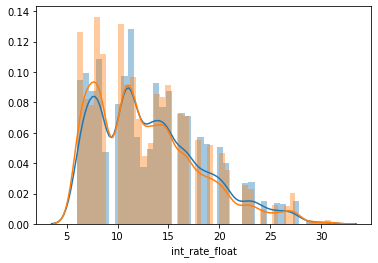

In [0]:
# Let's visualize that
import seaborn as sns
sns.distplot(subordinates['int_rate_float']);
sns.distplot(managers['int_rate_float']);

Covert the term into integer

In [0]:
df['term'].head()

In [0]:
df['term'].dtype

dtype('O')

In [0]:
term0 = df.loc[0,'term']
print(term0)
term0

 36 months


' 36 months'

In [0]:
def int_term(mystring):
  return int(mystring.strip().strip('months'))

In [0]:
int_term(term0)

36

In [0]:
df['int1_term']=df['term'].apply(int_term)
df[['term','int1_term']].head()

,term,int1_term
0,36 months,36
1,36 months,36
2,60 months,60
3,36 months,36
4,36 months,36


In [0]:
df

Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Late (16-30 days)', 'Charged Off',
       'Late (31-120 days)', 'In Grace Period', 'Default'], dtype=object)

In [0]:
# create a new column loan_status_is_great
def loan_great(row):
  if (row['loan_status'] == "Fully Paid") | (row['loan_status']=="Current"):
    val=1
  else:
    val=0
  return val  
    
#apply the function
df['loan_status_is_great']= df.apply(loan_great,axis=1)

# verify
df[['loan_status','loan_status_is_great']].sample(6)

  

,loan_status,loan_status_is_great
54612,Current,1
11738,Fully Paid,1
8186,Current,1
108441,Fully Paid,1
41833,Current,1
68099,Current,1


In [0]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.


# look at the last_pymnt_d column
df['last_pymnt_d'].head()



0    Aug-2019
1    Jul-2019
2    Oct-2019
3    Oct-2019
4    Oct-2019
Name: last_pymnt_d, dtype: object

In [0]:
# Let's convert those strings to dates
df['last_pymnt_d_clean']=pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True)

In [0]:
# Make last_pymnt_d_month and last_pymnt_d_year column
df['last_pymnt_d_month']=df['last_pymnt_d_clean'].dt.month
df['last_pymnt_d_year']=df['last_pymnt_d_clean'].dt.year

In [0]:
# compare
df[['last_pymnt_d','last_pymnt_d_clean','last_pymnt_d_month','last_pymnt_d_year']].sample(5)

,last_pymnt_d,last_pymnt_d_clean,last_pymnt_d_month,last_pymnt_d_year
37277,Sep-2019,2019-09-01,9.0,2019.0
32209,Oct-2019,2019-10-01,10.0,2019.0
63842,Oct-2019,2019-10-01,10.0,2019.0
89771,Jul-2019,2019-07-01,7.0,2019.0
104769,Oct-2019,2019-10-01,10.0,2019.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01